In [273]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Set the Seaborn style
sns.set(style="whitegrid", font_scale=1.2)


In [274]:
# Function to be approximated
def target_function(x):
    return np.sin(x)

# Define the snake activation function
def snake(x):
    return torch.sin(x).pow(2) + x

# Generate training data
np.random.seed(42)
x_train = np.sort(np.random.uniform(0, 2*np.pi, 100))
y_train = target_function(x_train) + 0.1 * np.random.normal(size=100)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)


# Define the neural network with the snake activation
class UniversalApproximator(nn.Module):

    def __init__(self, hidden_neurons=100, snakeF=False):

        super(UniversalApproximator, self).__init__()

        self.hidden_layer = nn.Linear(1, hidden_neurons)
        self.activation = snake if snakeF else F.relu
        self.output_layer = nn.Linear(hidden_neurons, 1)

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        x = self.output_layer(x)
        return x



Epoch [20/200], Loss: 0.1732
Epoch [40/200], Loss: 0.1659
Epoch [60/200], Loss: 0.1506
Epoch [80/200], Loss: 0.1402
Epoch [100/200], Loss: 0.1299
Epoch [120/200], Loss: 0.1191
Epoch [140/200], Loss: 0.1074
Epoch [160/200], Loss: 0.0981
Epoch [180/200], Loss: 0.0906
Epoch [200/200], Loss: 0.0824


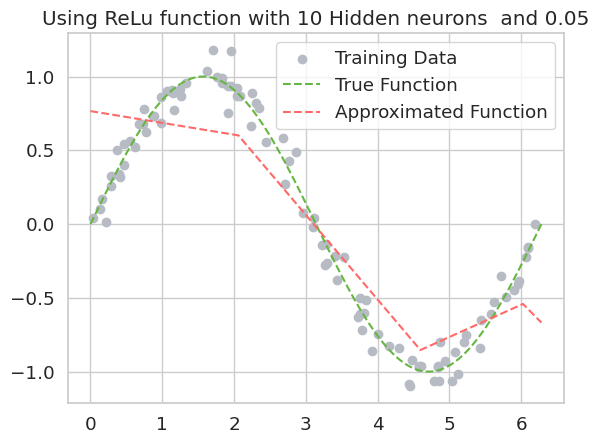

In [275]:
def createModel(hidden_neurons=100,lr=0.1,snakeF=False):

  # Instantiate the model, loss function, and optimizer
  model = UniversalApproximator(hidden_neurons=hidden_neurons,snakeF=snakeF)
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  # Training the neural network
  num_epochs = 200

  for epoch in range(num_epochs):
      # Forward pass
      output = model(x_train_tensor)
      loss = criterion(output, y_train_tensor)

      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (epoch + 1) % 20 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

  # Test the trained model
  x_test = np.linspace(0, 2*np.pi, 1000)
  x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
  with torch.no_grad():
      y_pred = model(x_test_tensor).numpy()

  # Plot the results
  title=str(hidden_neurons)+' Hidden neurons '+' and '+str(lr)
  title = 'Using Snake function with '+title if snakeF else 'Using ReLu function with '+title
  plt.title(title)
  plt.scatter(x_train, y_train, label='Training Data',color='#B6BBC4')
  plt.plot(x_test, target_function(x_test), label='True Function', linestyle='--', color='#65B741')
  plt.plot(x_test, y_pred, label='Approximated Function', linestyle='--', color='#FF6969')
  plt.legend()
  plt.show()

createModel(hidden_neurons=10,lr=0.05)


The Output of our ReLU network turns into a line the further we go away from our dataset

If you plug in absolutely large values in the ReLU neural network — meaning very far away from 0 — this network behaves like a linear function

Epoch [20/200], Loss: 0.6410
Epoch [40/200], Loss: 0.1667
Epoch [60/200], Loss: 0.1228
Epoch [80/200], Loss: 0.0958
Epoch [100/200], Loss: 0.0734
Epoch [120/200], Loss: 0.0558
Epoch [140/200], Loss: 0.0419
Epoch [160/200], Loss: 0.0309
Epoch [180/200], Loss: 0.0225
Epoch [200/200], Loss: 0.0167


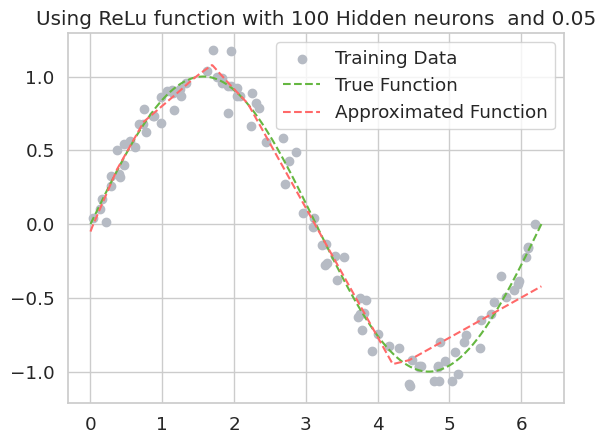

In [276]:
createModel(hidden_neurons=100,lr=0.05)

# Using the Snake Function

Epoch [20/200], Loss: 0.1882
Epoch [40/200], Loss: 0.0371
Epoch [60/200], Loss: 0.0121
Epoch [80/200], Loss: 0.0110
Epoch [100/200], Loss: 0.0098
Epoch [120/200], Loss: 0.0094
Epoch [140/200], Loss: 0.0090
Epoch [160/200], Loss: 0.0088
Epoch [180/200], Loss: 0.0086
Epoch [200/200], Loss: 0.0085


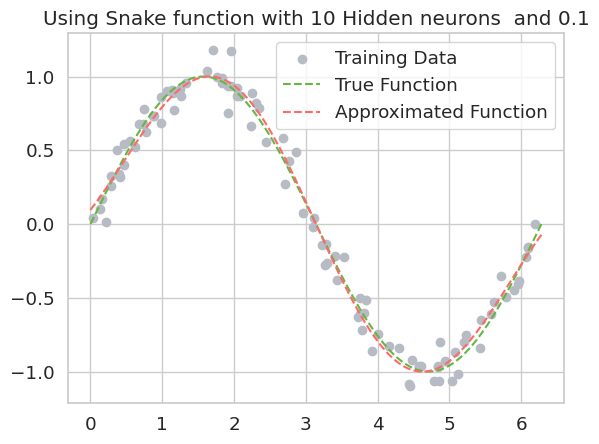

In [277]:
createModel(hidden_neurons=10,lr=0.1,snakeF=True)